# SOME LIBRARIES

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from pulp import * 
import seaborn as sns

# NUTRITIONS DATA

In [31]:
data = pd.read_csv('nutrition.csv.zip').drop('Unnamed: 0',axis=1)
data.head()


,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [32]:
data



,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,0.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8784,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,125,3.5g,1.4g,62mg,54.00 mg,64.5 mg,4.00 mcg,0.00 mcg,...,3.50 g,1.353 g,1.554 g,0.244 g,62.00 mg,0.0 g,1.11 g,0.00 mg,0.00 mg,72.51 g
8785,"Lamb, cooked, separable lean only, composite o...",100 g,206,8.9g,3.9g,109mg,50.00 mg,0,0.00 mcg,0.00 mcg,...,8.86 g,3.860 g,3.480 g,0.520 g,109.00 mg,0,1.60 g,0,0,59.95 g
8786,"Lamb, raw, separable lean and fat, composite o...",100 g,277,23g,12g,78mg,39.00 mg,0,1.00 mcg,0.00 mcg,...,22.74 g,11.570 g,8.720 g,0.980 g,78.00 mg,0,0.92 g,0,0,59.80 g
8787,"Beef, raw, all grades, trimmed to 0"" fat, sepa...",100 g,121,3g,1.1g,60mg,53.00 mg,64.2 mg,4.00 mcg,0.00 mcg,...,3.04 g,1.086 g,1.266 g,0.233 g,60.00 mg,0.0 g,1.10 g,0.00 mg,0.00 mg,73.43 g


# SUMMARY LOOKS

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         8789 non-null   object
 1   serving_size                 8789 non-null   object
 2   calories                     8789 non-null   int64 
 3   total_fat                    8789 non-null   object
 4   saturated_fat                7199 non-null   object
 5   cholesterol                  8789 non-null   object
 6   sodium                       8789 non-null   object
 7   choline                      8789 non-null   object
 8   folate                       8789 non-null   object
 9   folic_acid                   8789 non-null   object
 10  niacin                       8789 non-null   object
 11  pantothenic_acid             8789 non-null   object
 12  riboflavin                   8789 non-null   object
 13  thiamin                      8789

# CHECKING NULLSET

In [33]:
data.isnull().sum()

name                0
serving_size        0
calories            0
total_fat           0
saturated_fat    1590
                 ... 
alcohol             0
ash                 0
caffeine            0
theobromine         0
water               0
Length: 76, dtype: int64

# SELECTING THOSE COLUMNS IN THE DATASET

In [34]:
data = data[['name','serving_size','calories','carbohydrate','total_fat','protein']]
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          8789 non-null   object
 1   serving_size  8789 non-null   object
 2   calories      8789 non-null   int64 
 3   carbohydrate  8789 non-null   object
 4   total_fat     8789 non-null   object
 5   protein       8789 non-null   object
dtypes: int64(1), object(5)
memory usage: 412.1+ KB
None


,name,serving_size,calories,carbohydrate,total_fat,protein
0,Cornstarch,100 g,381,91.27 g,0.1g,0.26 g
1,"Nuts, pecans",100 g,691,13.86 g,72g,9.17 g
2,"Eggplant, raw",100 g,25,5.88 g,0.2g,0.98 g
3,"Teff, uncooked",100 g,367,73.13 g,2.4g,13.30 g
4,"Sherbet, orange",100 g,144,30.40 g,2g,1.10 g


#  SERVING_SIZE LOOK TO BE 100g

<Axes: xlabel='serving_size', ylabel='count'>

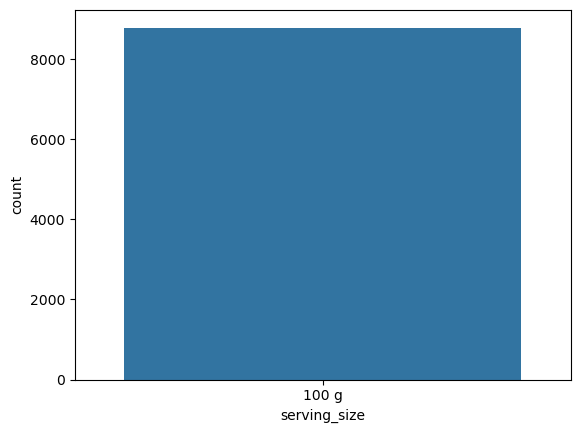

In [27]:

import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv('nutrition.csv.zip')
sns.countplot(x='serving_size',data=data)



In [28]:
data = data.drop('serving_size',axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8789 non-null   int64 
 1   name                         8789 non-null   object
 2   calories                     8789 non-null   int64 
 3   total_fat                    8789 non-null   object
 4   saturated_fat                7199 non-null   object
 5   cholesterol                  8789 non-null   object
 6   sodium                       8789 non-null   object
 7   choline                      8789 non-null   object
 8   folate                       8789 non-null   object
 9   folic_acid                   8789 non-null   object
 10  niacin                       8789 non-null   object
 11  pantothenic_acid             8789 non-null   object
 12  riboflavin                   8789 non-null   object
 13  thiamin                      8789

In [46]:
data['total_fat']


0        0.1
1       72.0
2        0.2
3        2.4
4        2.0
        ... 
8784     3.5
8785     8.9
8786    23.0
8787     3.0
8788     3.0
Name: total_fat, Length: 8789, dtype: float64

In [47]:
data['protein']


0        0.26
1        9.17
2        0.98
3       13.30
4        1.10
        ...  
8784    23.45
8785    29.59
8786    16.74
8787    23.37
8788    23.37
Name: protein, Length: 8789, dtype: float64

# VARIEGATE

In [48]:
week_days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
split_values = np.linspace(0,len(data),8).astype(int)
split_values[-1] = split_values[-1]-1
def random_dataset():
    frac_data = data.sample(frac=1).reset_index().drop('index',axis=1)
    day_data = []
    for s in range(len(split_values)-1):
        day_data.append(frac_data.loc[split_values[s]:split_values[s+1]])
    return dict(zip(week_days,day_data))

# LIST OF FOOD THAT WE CAN EAT 

In [49]:
random_dataset()['Monday']


,name,serving_size,calories,carbohydrate,total_fat,protein
0,"Soup, prepared with equal volume water, canned...",100 g,35,4.38,1.7,0.94
1,"Jams and preserves, apricot",100 g,242,64.40,0.2,0.70
2,"Apricots, uncooked, sulfured, dehydrated (low-...",100 g,320,82.89,0.6,4.90
3,"English muffins, toasted (includes apple-cinna...",100 g,276,55.04,2.2,8.87
4,"Vitasoy USA Azumaya, Silken Tofu",100 g,43,0.58,2.4,4.82
...,...,...,...,...,...,...
1251,"SWANSON BROTH, Certified Organic Vegetable Broth",100 g,5,1.28,0.0,0.00
1252,"Potatoes, unprepared, frozen, wedge cut, frenc...",100 g,166,22.22,7.5,2.56
1253,"Babyfood, toddler, dices, apples",100 g,51,12.10,0.1,0.20
1254,"Nuts, canned, flaked, sweetened, dried (desicc...",100 g,443,40.91,32.0,3.35


# GRAMS OF FOOD AND CALORIES

In [50]:
def build_nutritional_values(kg,calories):
    protein_calories = kg*4
    res_calories = calories-protein_calories
    carb_calories = calories/2.
    fat_calories = calories-carb_calories-protein_calories
    res = {'Protein Calories':protein_calories,'Carbohydrates Calories':carb_calories,'Fat Calories':fat_calories}
    return res



In [51]:
def extract_gram(table):
    protein_grams = table['Protein Calories']/4.
    carbs_grams = table['Carbohydrates Calories']/4.
    fat_grams = table['Fat Calories']/9.
    res = {'Protein Grams':protein_grams, 'Carbohydrates Grams':carbs_grams,'Fat Grams':fat_grams}
    return res



#  let’s say that our weight is 70 kg and we need to eat 2000 calories per day. We will need to eat



In [52]:
build_nutritional_values(70,2000)


{'Protein Calories': 280,
 'Carbohydrates Calories': 1000.0,
 'Fat Calories': 720.0}

# Grams

In [53]:
print(extract_gram(build_nutritional_values(70,2000)))


{'Protein Grams': 70.0, 'Carbohydrates Grams': 250.0, 'Fat Grams': 80.0}


# LINEAR OPTIMIZATION

In [54]:


days_data = random_dataset()
def model(day,kg,calories):
    G = extract_gram(build_nutritional_values(kg,calories))
    E = G['Carbohydrates Grams']
    F = G['Fat Grams']
    P = G['Protein Grams']
    day_data = days_data[day]
    day_data = day_data[day_data.calories!=0]
    food = day_data.name.tolist()
    c  = day_data.calories.tolist()
    x  = pulp.LpVariable.dicts( "x", indices = food, lowBound=0, upBound=1.5, cat='Continuous', indexStart=[] )
    e = day_data.carbohydrate.tolist()
    f = day_data.total_fat.tolist()
    p = day_data.protein.tolist()
    prob  = pulp.LpProblem( "Diet", LpMinimize )
    prob += pulp.lpSum( [x[food[i]]*c[i] for i in range(len(food))]  )
    prob += pulp.lpSum( [x[food[i]]*e[i] for i in range(len(x)) ] )>=E
    prob += pulp.lpSum( [x[food[i]]*f[i] for i in range(len(x)) ] )>=F
    prob += pulp.lpSum( [x[food[i]]*p[i] for i in range(len(x)) ] )>=P
    prob.solve()
    variables = []
    values = []
    for v in prob.variables():
        variable = v.name
        value = v.varValue
        variables.append(variable)
        values.append(value)
    values = np.array(values).round(2).astype(float)
    sol = pd.DataFrame(np.array([food,values]).T, columns = ['Food','Quantity'])
    sol['Quantity'] = sol.Quantity.astype(float)
    return sol



In [55]:
pip install pulp


In [56]:

from pulp import * 

sol_monday = model('Monday',70,1500)


# RESULT

In [57]:
sol_monday = sol_monday[sol_monday['Quantity']!=0.0]
sol_monday.Quantity = sol_monday.Quantity*100
sol_monday = sol_monday.rename(columns={'Quantity':'Quantity (g)'})
sol_monday

,Food,Quantity (g)
15,"Babyfood, strained, bananas and rice, plums",150.0
268,"Candies, SKITTLES Original Bite Size Candies, ...",150.0
354,"Wheat, uncooked, KAMUT khorasan",62.0
594,"Chicken pot pie, prepared, frozen entree",150.0
796,"KEEBLER, Wheat Crackers, TOWN HOUSE",4.0
1042,"POPEYES, meat and skin with breading, Breast, ...",150.0
1109,"Cereals ready-to-eat, KASHI GOLEAN CRISP Cinna...",150.0
1110,"Beef, braised, cooked, select, trimmed to 0"" f...",145.0
1115,"Sauce, reduced sodium, ready-to-serve, teriyaki",150.0


# FINAL PRODUCT

In [58]:
def model(prob,day,kg,calories):
    G = extract_gram(build_nutritional_values(kg,calories))
    E = G['Carbohydrates Grams']
    F = G['Fat Grams']
    P = G['Protein Grams']
    day_data = days_data[day]
    day_data = day_data[day_data.calories!=0]
    food = day_data.name.tolist()
    c  = day_data.calories.tolist()
    x  = pulp.LpVariable.dicts( "x", indices = food, lowBound=0, upBound=1.5, cat='Continuous', indexStart=[] )
    e = day_data.carbohydrate.tolist()
    f = day_data.total_fat.tolist()
    p = day_data.protein.tolist()
#    prob  = pulp.LpProblem( "Diet", LpMinimize )
    prob += pulp.lpSum( [x[food[i]]*c[i] for i in range(len(food))]  )
    prob += pulp.lpSum( [x[food[i]]*e[i] for i in range(len(x)) ] )>=E
    prob += pulp.lpSum( [x[food[i]]*f[i] for i in range(len(x)) ] )>=F
    prob += pulp.lpSum( [x[food[i]]*p[i] for i in range(len(x)) ] )>=P
    prob.solve()
    variables = []
    values = []
    for v in prob.variables():
        variable = v.name
        value = v.varValue
        variables.append(variable)
        values.append(value)
    values = np.array(values).round(2).astype(float)
    sol = pd.DataFrame(np.array([food,values]).T, columns = ['Food','Quantity'])
    sol['Quantity'] = sol.Quantity.astype(float)
    sol = sol[sol['Quantity']!=0.0]
    sol.Quantity = sol.Quantity*100
    sol = sol.rename(columns={'Quantity':'Quantity (g)'})
    return sol
def total_model(kg,calories):
    result = []
    for day in week_days:
        prob  = pulp.LpProblem( "Diet", LpMinimize )
        print('Building a model for day %s \n'%(day))
        result.append(model(prob,day,kg,calories))
    return dict(zip(week_days,result))



# DIET

In [59]:
diet = total_model(70,3000)


Building a model for day Monday 

Building a model for day Tuesday 

Building a model for day Wednesday 

Building a model for day Thursday 

Building a model for day Friday 

Building a model for day Saturday 

Building a model for day Sunday 



In [60]:
diet


{'Monday':                                                    Food  Quantity (g)
 15          Babyfood, strained, bananas and rice, plums         150.0
 268   Candies, SKITTLES Original Bite Size Candies, ...         150.0
 354                     Wheat, uncooked, KAMUT khorasan         150.0
 385                     McDONALD'S, Spicy Buffalo Sauce          58.0
 594            Chicken pot pie, prepared, frozen entree         150.0
 796                 KEEBLER, Wheat Crackers, TOWN HOUSE         112.0
 1042  POPEYES, meat and skin with breading, Breast, ...         150.0
 1109  Cereals ready-to-eat, KASHI GOLEAN CRISP Cinna...          41.0
 1115    Sauce, reduced sodium, ready-to-serve, teriyaki         150.0
 1120  Apricots, solids and liquids, with skin, juice...         150.0,
 'Tuesday':                                                    Food  Quantity (g)
 397    Cereals, dry, 1 minute cook time, CREAM OF WHEAT         150.0
 648          Waffles, ready-to-heat, frozen, buttermil

In [61]:
import random
from random import*
from pulp import * 


In [63]:
def better_model(kg,calories):
    days_data = random_dataset_day()
    res_model = []
    for day in week_days:
        day_data = days_data[day]
        meals_data = random_dataset_meal(day_data)
        meal_model = []
        for meal in meals:
            meal_data = meals_data[meal]
            prob  = pulp.LpProblem( "Diet", LpMinimize )
            sol_model = model(prob,kg,calories,meal,meal_data)
            meal_model.append(sol_model)
        res_model.append(meal_model)
    unpacked = []
    for i in range(len(res_model)):
        unpacked.append(dict(zip(meals,model_res[i])))
    unpacked_tot = dict(zip(week_days,unpacked))
    return unpacked_tot


In [64]:
split_size = np.linspace(0,len(data),8)


# DIET FOOD EATS ON MONDAY

In [65]:

diet['Monday']


,Food,Quantity (g)
15,"Babyfood, strained, bananas and rice, plums",150.0
268,"Candies, SKITTLES Original Bite Size Candies, ...",150.0
354,"Wheat, uncooked, KAMUT khorasan",150.0
385,"McDONALD'S, Spicy Buffalo Sauce",58.0
594,"Chicken pot pie, prepared, frozen entree",150.0
796,"KEEBLER, Wheat Crackers, TOWN HOUSE",112.0
1042,"POPEYES, meat and skin with breading, Breast, ...",150.0
1109,"Cereals ready-to-eat, KASHI GOLEAN CRISP Cinna...",41.0
1115,"Sauce, reduced sodium, ready-to-serve, teriyaki",150.0
1120,"Apricots, solids and liquids, with skin, juice...",150.0


# DIET FOOD EATS ON TUESDAY

In [66]:
diet['Tuesday']

,Food,Quantity (g)
397,"Cereals, dry, 1 minute cook time, CREAM OF WHEAT",150.0
648,"Waffles, ready-to-heat, frozen, buttermilk",150.0
680,"Turkey, raw, from turkey frames, mechanically ...",63.0
769,"Pie fillings, low calorie, cherry",150.0
792,"CAMPBELL'S Low Sodium Soups, Chicken with Nood...",150.0
795,"Formulated Bar, SOUTH BEACH protein bar",129.0
1235,"Beans, raw, mature seeds, red, kidney",126.0


# DIET FOOD EATS ON WEDNESDAY

In [68]:
diet['Wednesday']

,Food,Quantity (g)
360,"Celery flakes, dried",150.0
421,"Cereals ready-to-eat, Banana Nut, CHEERIOS, GE...",150.0
427,"Cereals ready-to-eat, RALSTON Corn Biscuits",150.0
709,"AUSTIN, reduced fat, sandwich-type, Peanut But...",150.0
711,"Chicken, raw, separable fat, broilers or fryers",150.0
713,"Soup, prepared with equal volume water, canned...",150.0
720,"Onions, with salt, drained, boiled, cooked, wh...",150.0
1128,"Beef, raw, 97% lean meat / 3% fat, ground",37.0
1144,"Beverages, unsweetened, lemon, instant, tea",150.0
1150,"MOTHER'S, Old Fashioned Oatmeal Cookies",150.0


# DIET FOOD EATS ON THURSDAY

In [69]:
diet['Thursday']

,Food,Quantity (g)
255,"Frostings, NFSMI Recipe No. C-32, with butter,...",117.0
474,"Crustaceans, made from surimi, imitation, alas...",150.0
769,"Beef, raw, select, trimmed to 0"" fat, separabl...",150.0
805,"KEEBLER, Toasted Pecan, Nut Crisp Crackers, WH...",6.0
852,"Shortening confectionery, coconut (hydrogenate...",130.0
863,"Candies, low sugar or low calorie, chocolate c...",150.0


# DIET FOOD EATS ON FRIDAY

In [70]:
diet['Friday']

,Food,Quantity (g)
59,"Lamb, raw, trimmed to 1/4"" fat, separable lean...",150.0
258,"Alcoholic beverage, whiskey and powder mix, pr...",150.0
264,"Beef, grilled, cooked, choice, trimmed to 0"" f...",150.0
758,"KELLOGG'S, Corn Flakes Crumbs",150.0
829,"Oil, poppyseed",49.0
1063,"Candies, SYMPHONY Milk Chocolate Bar",37.0
1135,"Seeds, without salt, sunflower seed butter",150.0
1139,"Crackers, whole grain, cheese",98.0


# DIET FOOD EATS ON SATURDAY

In [71]:
diet['Saturday']

,Food,Quantity (g)
28,"Babyfood, mixed fruit juice with low fat yogurt",150.0
364,"Pasta, TINKYADA, cooked, brown rice flour, glu...",150.0
748,"Beef, pan-browned, cooked, crumbles, 85% lean ...",66.0
801,Fruit syrup,150.0
832,"KELLOGG'S, Frosted Chocolate Baked Bites, POP-...",24.0
1005,"Pork, pan-fried, cooked, separable lean only, ...",150.0
1117,"KEEBLER, Peanut Butter Cups Cookies, CHIPS DELUXE",93.0
1121,"Soup, condensed, canned, new england, clam cho...",150.0


# DIET FOOD EATS ON SUNDAY

In [72]:
diet['Sunday']

,Food,Quantity (g)
63,"Candies, KIT KAT BIG KAT Bar, HERSHEY",150.0
343,"KASHI Pizza, unprepared, frozen, Mushroom Trio...",150.0
471,"PACE, Salsa Refried Beans",150.0
475,"Turnip greens and turnips, unprepared, frozen",150.0
803,"Chicken, roasted, cooked, meat and skin, wing,...",150.0
857,"T.G.I. FRIDAY'S, breaded, FRIDAY'S Shrimp",150.0
869,"Chicken, roasted, cooked, meat and skin, drums...",83.0
1063,"Beef, pan-fried, cooked, liver, variety meats ...",150.0
1141,"Fish, dry heat, cooked, greenland, halibut",150.0
1147,"Sauce, peanuts, sugar, water, made from coconu...",83.0
